In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load the dataset
df=pd.read_csv(r"C:\Users\ziyad\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
# check the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
# summary statistics of the dataframe
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## Outlier detection and removal using mean function

In [8]:
# calculating mean and standard deviation
mean_price_per_sqft=df["price_per_sqft"].mean()
mean_price_per_sqft

7920.336742424242

In [9]:
std_dev_price_per_sqft=df["price_per_sqft"].std()
std_dev_price_per_sqft

106727.16032810845

In [10]:
# define a threshold
threshold=3

In [11]:
# detect outliers
outliers_mean=df[(df["price_per_sqft"]<mean_price_per_sqft-threshold*std_dev_price_per_sqft)|
(df["price_per_sqft"]>mean_price_per_sqft+threshold*std_dev_price_per_sqft)]

In [12]:
# remove outliers
df_cleaned_mean=df[~df["price_per_sqft"].isin(outliers_mean["price_per_sqft"])]

In [13]:
#print the number of outliers detected
print("Number of outliers detected using mean function : ",len(outliers_mean))

Number of outliers detected using mean function :  5


## Outlier detection and removal using percentile method

In [14]:
# calculate lower and upper percentile values
lower_percentile=df["price_per_sqft"].quantile(0.05)
lower_percentile

3107.8500000000004

In [15]:
upper_percentile=df["price_per_sqft"].quantile(0.95)
upper_percentile

15312.099999999984

In [16]:
# detect outliers
outliers_percentile=df[(df["price_per_sqft"]<lower_percentile)|(df["price_per_sqft"]>upper_percentile)]

In [17]:
# remove outliers
df_cleaned_percentile=df[~df["price_per_sqft"].isin(outliers_percentile["price_per_sqft"])]

In [18]:
# print number of outliers detected
print("Number of outliers detected using percentile method : ",len(outliers_percentile))

Number of outliers detected using percentile method :  1320


## Outlier detection and removal using IQR method

In [19]:
# calculate the first quartile
q1=df["price_per_sqft"].quantile(0.25)
q1

4267.0

In [20]:
# calculate the third quartile
q3=df["price_per_sqft"].quantile(0.75)
q3

7317.0

In [21]:
# calculate the inter quartile range
IQR=q3-q1
IQR

3050.0

In [22]:
# define lower and upper bounds for outlier detection
lower_bound=q1-1.5*IQR
lower_bound

-308.0

In [23]:
upper_bound=q3+1.5*IQR
upper_bound

11892.0

In [24]:
# detect outliers
outliers_IQR=df[(df["price_per_sqft"]<lower_bound)|(df["price_per_sqft"]>upper_bound)]

In [25]:
# remove outliers
df_cleaned_IQR=df[~df["price_per_sqft"].isin(outliers_IQR["price_per_sqft"])]

In [26]:
# print number of outliers detected
print("Number of outliers detected by IQR method : ",len(outliers_IQR))

Number of outliers detected by IQR method :  1265


## Outlier detection and removal using zscore method

In [27]:
from scipy.stats import zscore

In [28]:
# calculate z scores
df["z_score"]=zscore(df["price_per_sqft"])
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391


In [29]:
# define threshold
threshold=3

In [30]:
# outlier detection
outliers_zscore=df[(df["price_per_sqft"]>threshold)|(df["price_per_sqft"]<-threshold)]

In [31]:
# remove outliers
df_cleaned_zscore=df[~df["price_per_sqft"].isin(outliers_zscore["price_per_sqft"])]

In [32]:
# print the number of outliers detected
print("Number of outliers detected using Zscore method : ",len(outliers_zscore))

Number of outliers detected using Zscore method :  13200


## Boxplot for all numeric columns

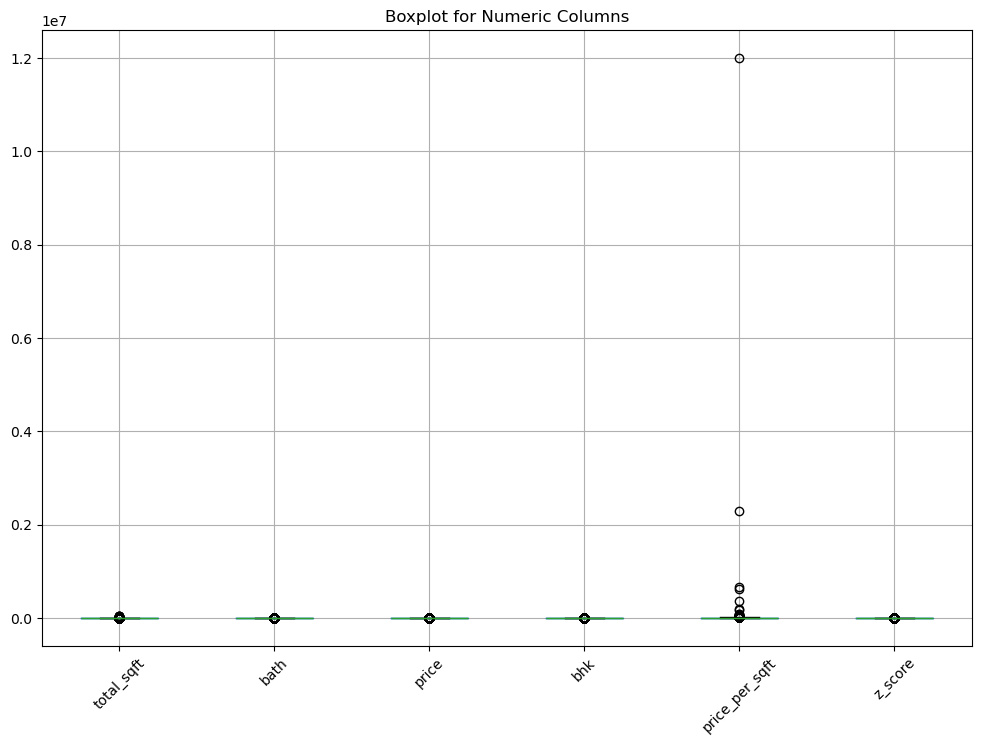

In [33]:
df.boxplot(figsize=(12, 8))
plt.title('Boxplot for Numeric Columns')
plt.xticks(rotation=45)
plt.show()

## Histplot for price_per_sqft column

In [ ]:
# Create a histogram plot for the "price per sqft" column
plt.figure(figsize=(8, 6))
sns.histplot(df['price_per_sqft'])
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

C:\Users\ziyad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


## Check correlation between all numeric columns and plot heatmap

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

## Scatterplot between variables to check correltaion between them

In [ ]:
# Create a pairplot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns')
plt.show()